In [14]:
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import os
import time
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates


In [15]:
# Get the fred api key
load_dotenv("keys.env")
fred_api_key = os.getenv("FRED_API_KEY")

# Retrieve FRED Data
### Federal Reserve Economic Data (FRED)
##### Maintained by Federal Reserve Bank of St. Louis 

In [16]:
# Store FRED data in a dictionary
df_dict = {"income_adjusted": "MEPAINUSA672N", "house": "NCSTHPI", "house_cpi": "CPIHOSSL",
           "minimum_wage": "STTMINWGNC", "rent_cpi": "CUUR0000SEHA", "mortgage": "MORTGAGE30US",
           "population": "NCPOP", "electricity": "APU000072610", "car_cpi": "CUSR0000SETA01", "gas": "APU000074714"}

for key, value in df_dict.items():
    try:
        data = requests.get(f"https://api.stlouisfed.org/fred/series/observations?series_id={value}&api_key={fred_api_key}&file_type=json").json()
        df = pd.DataFrame(data['observations'])
        df_dict[key] = df
    except:
        print(f"Problem getting data for {key}: {value}")


# Clean up Data from FRED
## Store the data as csv files in data folder

In [17]:
# Read the CSV files, and store dataframes. Some clean up as well.
def percent_change_column(df):
    """Create a column that shows how much the value has changed overtime"""
    df['changed'] = (df['value'].pct_change() * 100).cumsum().fillna(0)
    return df

def locate_year_df(df):
    """Take a df and return the dataframe within the year 1980-2023"""
    df = df.loc[(df['date'] >= "1980-01-01") & (df['date'] <= "2023-12-31")].reset_index(drop=True)
    return df

def conversion_date_value(df):
    """Convert the columns date to datetime and value to float"""
    conversions = {
    'date': 'datetime64[ns]',
    'value': float
    }

    # Drop any rows where the value column is non numeric
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df.drop(columns=['realtime_start', 'realtime_end']).astype(conversions)
    return df

# Clean the data and store them as a csv file in the data folder.
data_dict = {}
for key, value in df_dict.items():
    df_key = f"{key}_df"
    try:
        data_dict[(df_key)] = percent_change_column(locate_year_df(conversion_date_value(value)))

        data_dict[df_key].to_csv(f"data/{key}.csv")
    except:
        print(f"Error with {key} dataset.")


/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_11710/1689987472.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['changed'] = (df['value'].pct_change() * 100).cumsum().fillna(0)
/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_11710/1689987472.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['changed'] = (df['value'].pct_change() * 100).cumsum().fillna(0)


# Display FRED Data

In [18]:
# Display the DataFrames first 2 and last 2 rows
for key, value in data_dict.items():
    clean_key = key.replace("_", " ")
    print(clean_key)
    display(pd.concat([value.head(2), value.tail(2)]))

income adjusted df


,date,value,changed
0,1980-01-01,25380.0,0.000000
1,1981-01-01,24880.0,-1.970055
41,2021-01-01,40460.0,47.762599
42,2022-01-01,40480.0,47.812030


house df


,date,value,changed
0,1980-01-01,100.00,0.000000
1,1980-04-01,98.91,-1.090000
174,2023-07-01,650.12,189.850435
175,2023-10-01,649.30,189.724304


house cpi df


,date,value,changed
0,1980-01-01,76.200,0.000000
1,1980-02-01,77.200,1.312336
526,2023-11-01,325.428,145.553847
527,2023-12-01,326.409,145.855296


minimum wage df


,date,value,changed
0,1980-01-01,2.75,0.000000
1,1981-01-01,2.90,5.454545
42,2022-01-01,7.25,104.031762
43,2023-01-01,7.25,104.031762


rent cpi df


,date,value,changed
0,1980-01-01,77.800,0.000000
1,1980-02-01,78.400,0.771208
526,2023-11-01,408.838,166.273353
527,2023-12-01,410.606,166.705799


mortgage df


,date,value,changed
0,1980-01-04,12.85,0.000000
1,1980-01-11,12.90,0.389105
2323,2023-12-21,6.67,-33.422587
2324,2023-12-28,6.61,-34.322137


population df


,date,value,changed
0,1980-01-01,5898.980,0.000000
1,1981-01-01,5956.653,0.977677
42,2022-01-01,10695.965,60.060587
43,2023-01-01,10835.491,61.365060


electricity df


,date,value,changed
0,1980-01-01,0.053,0.000000
1,1980-02-01,0.055,3.773585
526,2023-11-01,0.168,130.033561
527,2023-12-01,0.169,130.628799


car cpi df


,date,value,changed
0,1980-01-01,85.200,0.000000
1,1980-02-01,86.300,1.291080
526,2023-11-01,179.222,74.794595
527,2023-12-01,179.551,74.978166


gas df


,date,value,changed
0,1980-01-01,1.131,0.000000
1,1980-02-01,1.207,6.719717
526,2023-11-01,3.500,187.021941
527,2023-12-01,3.289,180.993370


# Plot the changed column for all of the datasets
## Shows how much the data has changed overtime

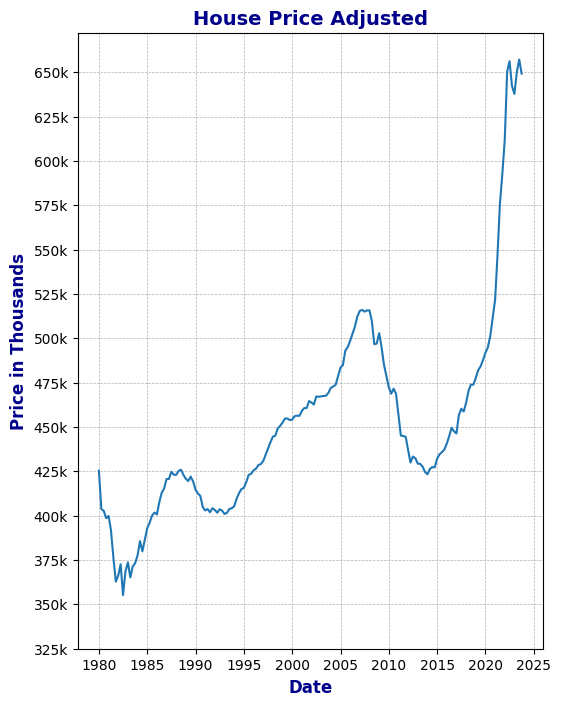

In [19]:
# Function to format y-axis labels with 'k' and 'm'
def format_y(value, tick_position):

    return f'{value}k'

# Adjusting house price with inflation

inflation_house = pd.merge(data_dict['house_df'], data_dict['house_cpi_df'], on='date')
inflation_house = inflation_house.drop(columns=['changed_x', 'changed_y'])
inflation_house.columns = ['date', 'price', 'cpi']
inflation_house['adjusted_price'] = (324.152/inflation_house['cpi']) * inflation_house['price']
inflation_house['changed'] = (inflation_house['adjusted_price'].pct_change() * 100).cumsum().fillna(0)


plt.figure(figsize=(6, 8))
plt.plot(inflation_house['date'], inflation_house['adjusted_price'])
plt.title("House Price Adjusted", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(325, 675, 25))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))
plt.savefig("graphs/house_price_adjusted.png")
plt.show()

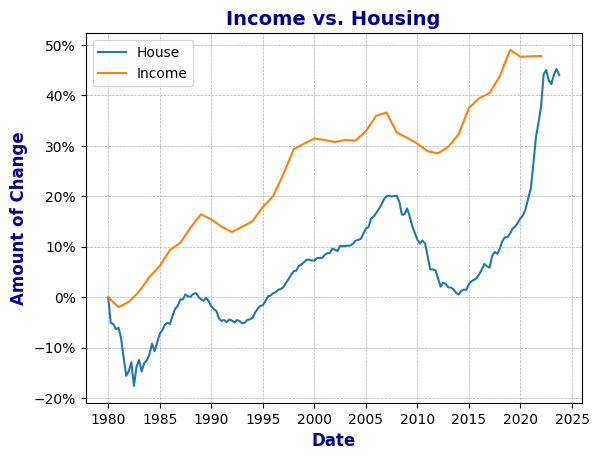

In [20]:
plt.plot(inflation_house['date'], inflation_house['changed'], label="House")
plt.plot(data_dict['income_adjusted_df']['date'], data_dict['income_adjusted_df']['changed'], label="Income")

plt.title("Income vs. Housing", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Amount of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("graphs/income_vs_housing.png")
plt.show()

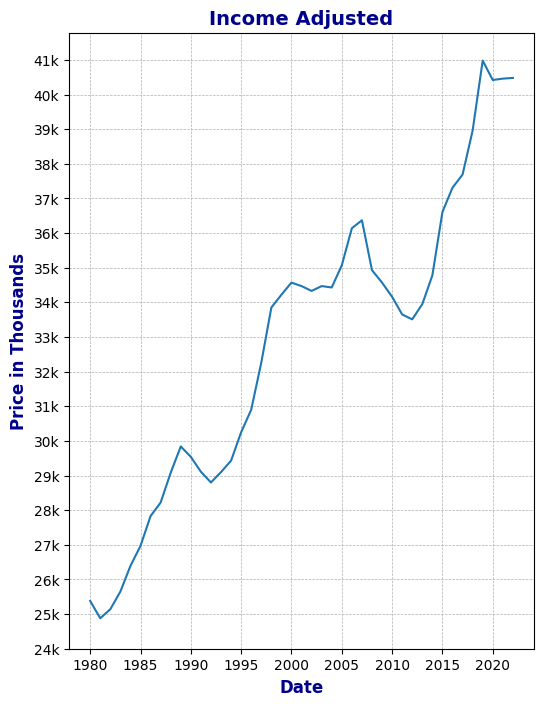

In [21]:
plt.figure(figsize=(6, 8))
plt.plot(data_dict['income_adjusted_df']['date'], data_dict['income_adjusted_df']['value']/1000)
plt.title("Income Adjusted", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(24, 42, 1))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))
plt.savefig("graphs/income_adjusted.png")
plt.show()

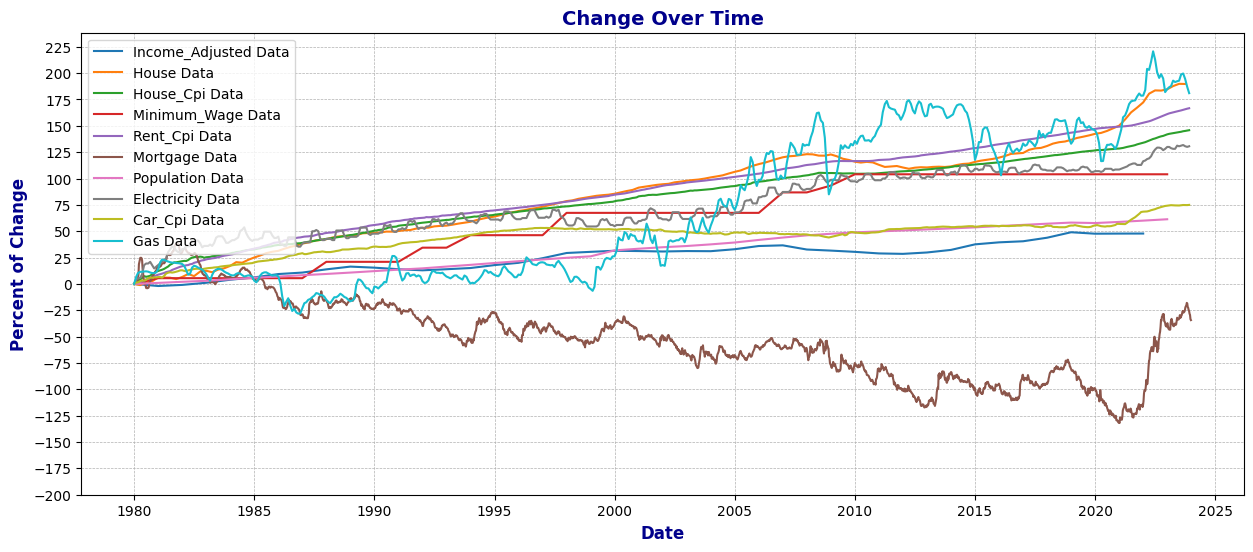

In [22]:
# Creating a visualization for income data
# Assuming df_income, df_house, and df_min_wage are your DataFrames
plt.figure(figsize=(15, 6))

# Plot each DataFrame
for key, value in data_dict.items():
    plt.plot(value['date'], value['changed'], label=f'{key.replace("_df", "").title()} Data')

plt.title("Change Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percent of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.legend()
plt.yticks(range(-200, 250, 25))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('graphs/change_over_time.png')
plt.show()


# Plot All of the Graphs

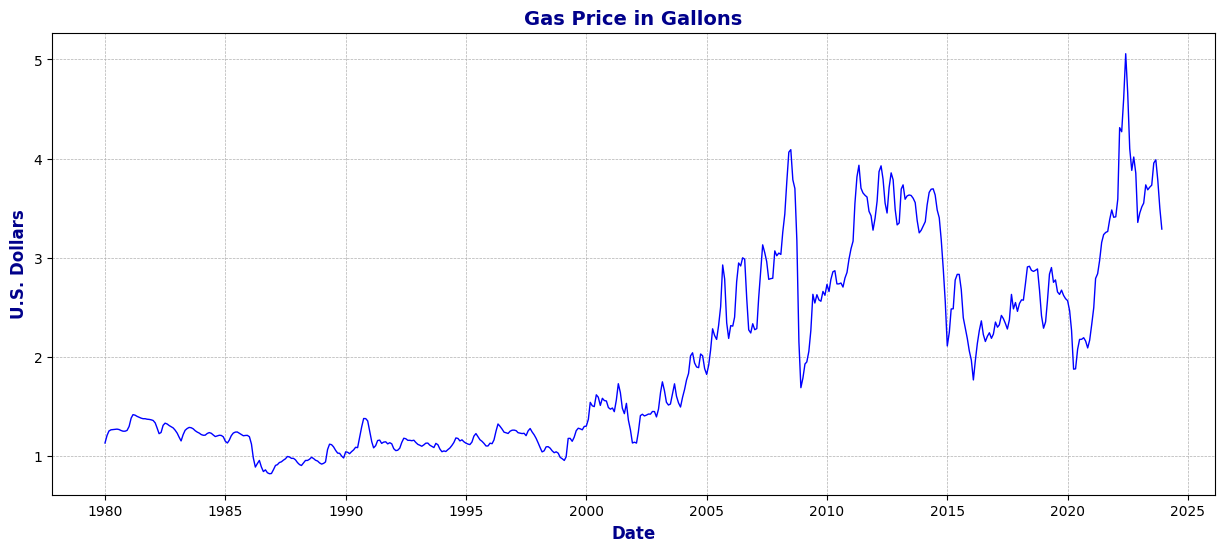

,date,value,changed
0,1980-01-01,1.131,0.000000
1,1980-02-01,1.207,6.719717
2,1980-03-01,1.252,10.447969
3,1980-04-01,1.264,11.406435
4,1980-05-01,1.266,11.564663
...,...,...,...
523,2023-08-01,3.955,198.809423
524,2023-09-01,3.988,199.643810
525,2023-10-01,3.782,194.478313
526,2023-11-01,3.500,187.021941


In [23]:
plt.figure(figsize=(15, 6))
plt.plot(data_dict['gas_df']['date'], data_dict['gas_df']['value'], linewidth=1, linestyle='-', color='blue')

plt.title("Gas Price in Gallons", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("U.S. Dollars", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('graphs/gas_price.png')
plt.show()
data_dict['gas_df']

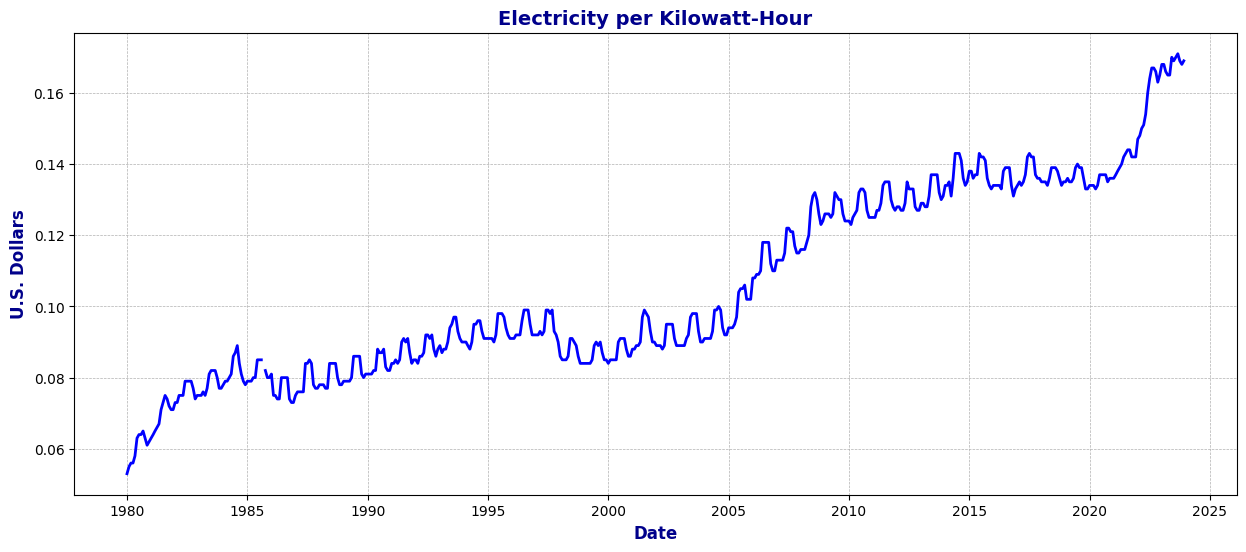

,date,value,changed
0,1980-01-01,0.053,0.000000
1,1980-02-01,0.055,3.773585
2,1980-03-01,0.056,5.591767
3,1980-04-01,0.056,5.591767
4,1980-05-01,0.058,9.163195
...,...,...,...
523,2023-08-01,0.170,131.206632
524,2023-09-01,0.171,131.794867
525,2023-10-01,0.169,130.625277
526,2023-11-01,0.168,130.033561


In [24]:
plt.figure(figsize=(15, 6))
plt.plot(data_dict['electricity_df']['date'], data_dict['electricity_df']['value'], linewidth=2, linestyle='-', color='blue')

plt.title("Electricity per Kilowatt-Hour", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("U.S. Dollars", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('graphs/electricity_price.png')
plt.show()
data_dict['electricity_df']

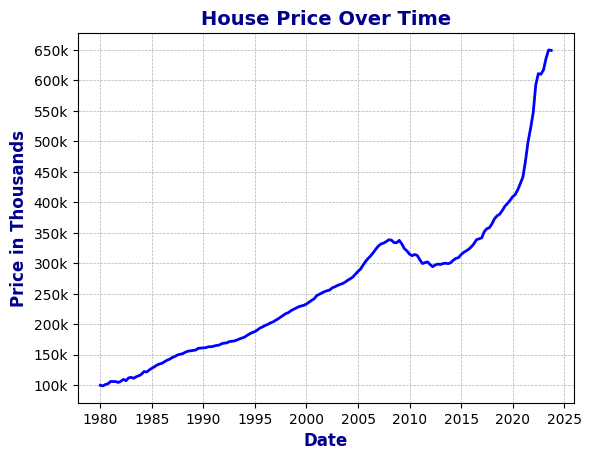

,date,value,changed
0,1980-01-01,100.00,0.000000
1,1980-04-01,98.91,-1.090000
2,1980-07-01,101.26,1.285897
3,1980-10-01,102.56,2.569721
4,1981-01-01,106.21,6.128613
...,...,...,...
171,2022-10-01,610.23,183.442224
172,2023-01-01,617.47,184.628662
173,2023-04-01,636.51,187.712212
174,2023-07-01,650.12,189.850435


In [25]:

plt.plot(data_dict['house_df']['date'], data_dict['house_df']['value'], linewidth=2, linestyle='-', color='blue')


plt.title("House Price Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(range(100, 700, 50))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('graphs/house_price_over_time.png')
plt.show()
data_dict['house_df']

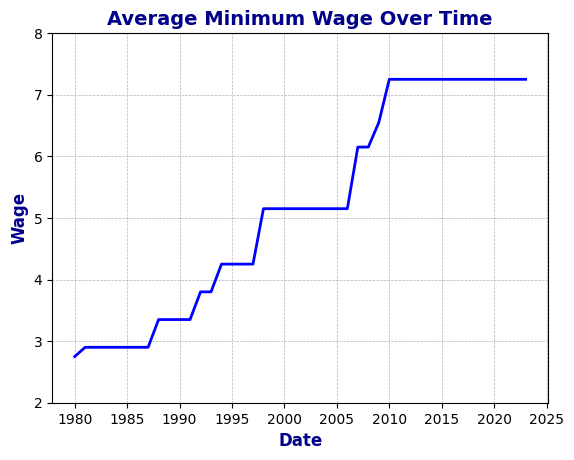

,date,value,changed
0,1980-01-01,2.75,0.000000
1,1981-01-01,2.90,5.454545
2,1982-01-01,2.90,5.454545
3,1983-01-01,2.90,5.454545
4,1984-01-01,2.90,5.454545
5,1985-01-01,2.90,5.454545
6,1986-01-01,2.90,5.454545
7,1987-01-01,2.90,5.454545
8,1988-01-01,3.35,20.971787
9,1989-01-01,3.35,20.971787


In [26]:
plt.plot(data_dict['minimum_wage_df']['date'], (data_dict['minimum_wage_df']['value']), linewidth=2, linestyle='-', color='blue')

plt.title("Average Minimum Wage Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Wage", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(2, 9, 1))
plt.savefig('graphs/min_wage_over_time.png')
plt.show()
data_dict['minimum_wage_df']

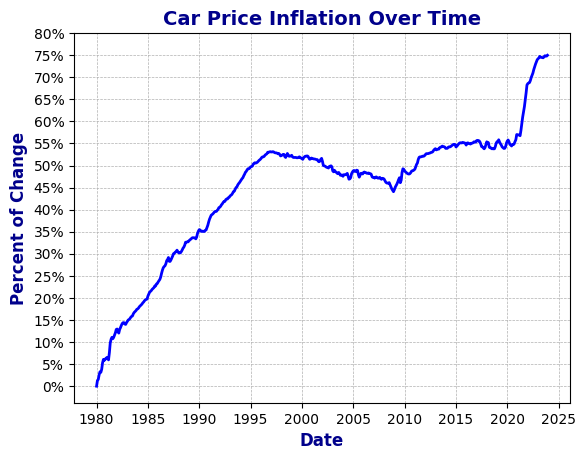

In [27]:
# Plot the CPI data for cars
plt.plot(data_dict['car_cpi_df']['date'], (data_dict['car_cpi_df']['changed']), linewidth=2, linestyle='-', color='blue')

plt.title("Car Price Inflation Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percent of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 85, 5))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

,date,value,changed,price
0,1980-01-01,85.200,0.000000,22776.815501
1,1980-02-01,86.300,1.291080,23070.882368
2,1980-03-01,86.500,1.522830,23124.349071
3,1980-04-01,87.400,2.563292,23364.949234
4,1980-05-01,88.000,3.249791,23525.349344
...,...,...,...,...
523,2023-08-01,178.927,74.629544,47833.183886
524,2023-09-01,179.361,74.872101,47949.206632
525,2023-10-01,179.247,74.808542,47918.730611
526,2023-11-01,179.222,74.794595,47912.047273


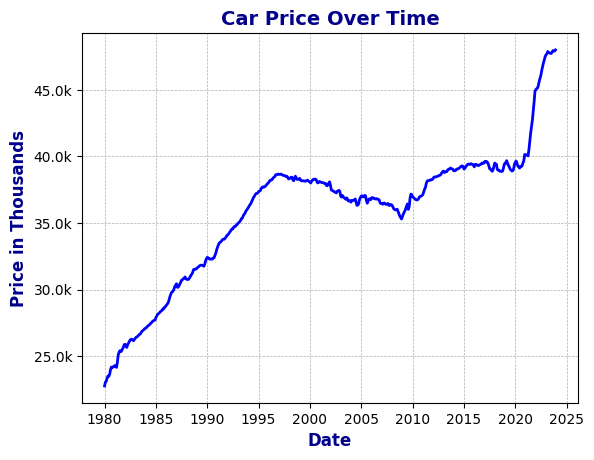

In [28]:
car_cpi = data_dict['car_cpi_df']
car_cpi['price'] = (car_cpi['value']/179.551) *48000
display(car_cpi)
plt.plot(car_cpi['date'], car_cpi['price']/1000, linewidth=2, linestyle='-', color='blue')

plt.title("Car Price Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))
plt.savefig('graphs/car_price.png')
plt.show()

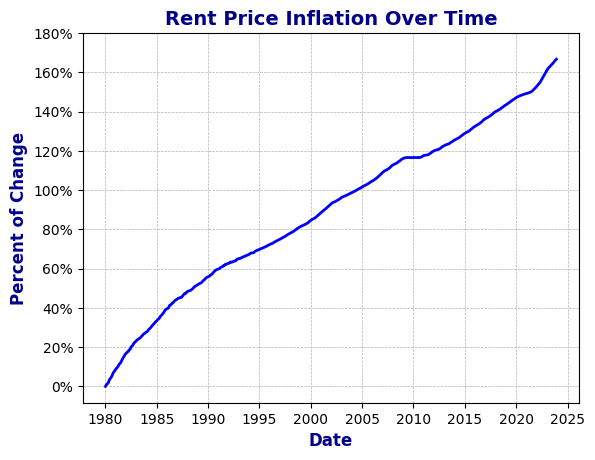

In [29]:
plt.plot(data_dict['rent_cpi_df']['date'], (data_dict['rent_cpi_df']['changed']), linewidth=2, linestyle='-', color='blue')

plt.title("Rent Price Inflation Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percent of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 200, 20))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

,date,value,changed,price
0,1980-01-01,77.800,0.000000,255.792658
1,1980-02-01,78.400,0.771208,257.765352
2,1980-03-01,78.800,1.281412,259.080481
3,1980-04-01,79.000,1.535219,259.738046
4,1980-05-01,79.800,2.547878,262.368304
...,...,...,...,...
523,2023-08-01,402.247,164.643675,1322.517085
524,2023-09-01,404.487,165.200547,1329.881809
525,2023-10-01,406.683,165.743457,1337.101869
526,2023-11-01,408.838,166.273353,1344.187128


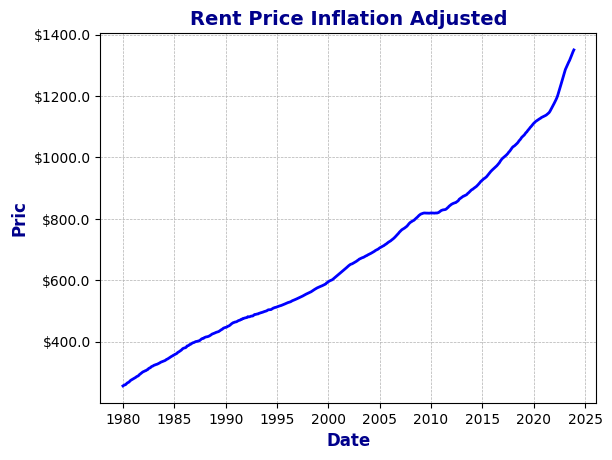

In [30]:
def format_dollar(value, tick_position):
    return f'${value}'

rent_cpi = data_dict['rent_cpi_df']
rent_cpi['price'] = (rent_cpi['value']/410.606) * 1350
display(rent_cpi)
plt.plot(rent_cpi['date'], rent_cpi['price'], linewidth=2, linestyle='-', color='blue')

plt.title("Rent Price Inflation Adjusted", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Pric", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_dollar))
plt.savefig('graphs/rent_price.png')
plt.show()

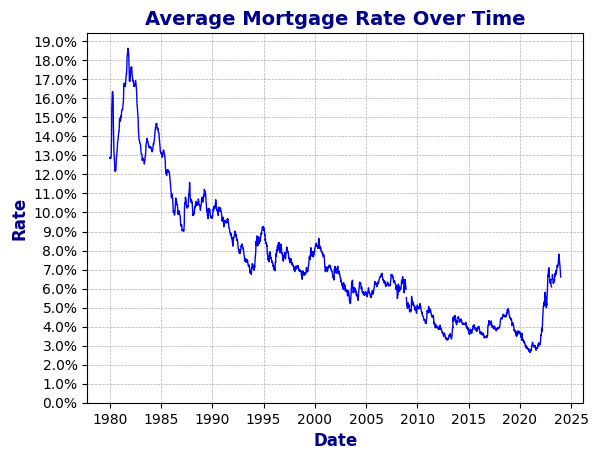

,date,value,changed
0,1980-01-04,12.85,0.000000
1,1980-01-11,12.90,0.389105
2,1980-01-18,12.87,0.156547
3,1980-01-25,12.89,0.311947
4,1980-02-01,12.85,0.001629
...,...,...,...
2320,2023-11-30,7.22,-25.624251
2321,2023-12-07,7.03,-28.255830
2322,2023-12-14,6.95,-29.393810
2323,2023-12-21,6.67,-33.422587


In [31]:
plt.plot(data_dict['mortgage_df']['date'], (data_dict['mortgage_df']['value']), linewidth=1, linestyle='-', color='blue')

plt.title("Average Mortgage Rate Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Rate", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 20, 1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('graphs/mortgage_rate_over_time.png')
plt.show()
data_dict['mortgage_df']

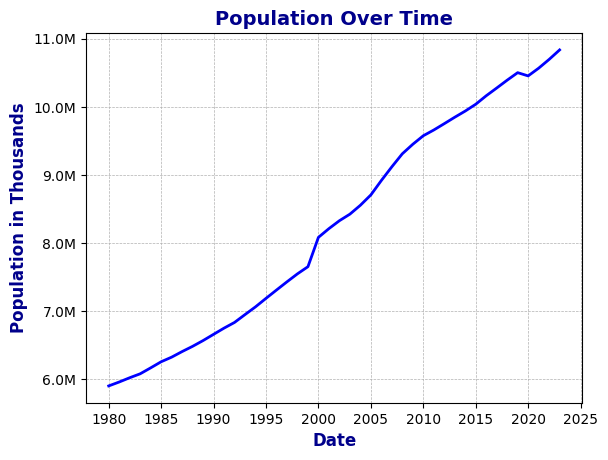

,date,value,changed
0,1980-01-01,5898.980,0.000000
1,1981-01-01,5956.653,0.977677
2,1982-01-01,6019.101,2.026051
3,1983-01-01,6077.056,2.988903
4,1984-01-01,6164.006,4.419694
5,1985-01-01,6253.954,5.878940
6,1986-01-01,6321.578,6.960240
7,1987-01-01,6403.700,8.259315
8,1988-01-01,6480.594,9.460089
9,1989-01-01,6565.459,10.769614


In [32]:
def format_m(value, tick_position):
    return f"{value}.0M"

plt.plot(data_dict['population_df']['date'], (data_dict['population_df']['value']/1000), linewidth=2, linestyle='-', color='blue')

plt.title("Population Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Population in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(6, 12, 1))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_m))
plt.savefig('graphs/population_over_time.png')
plt.show()
data_dict['population_df']

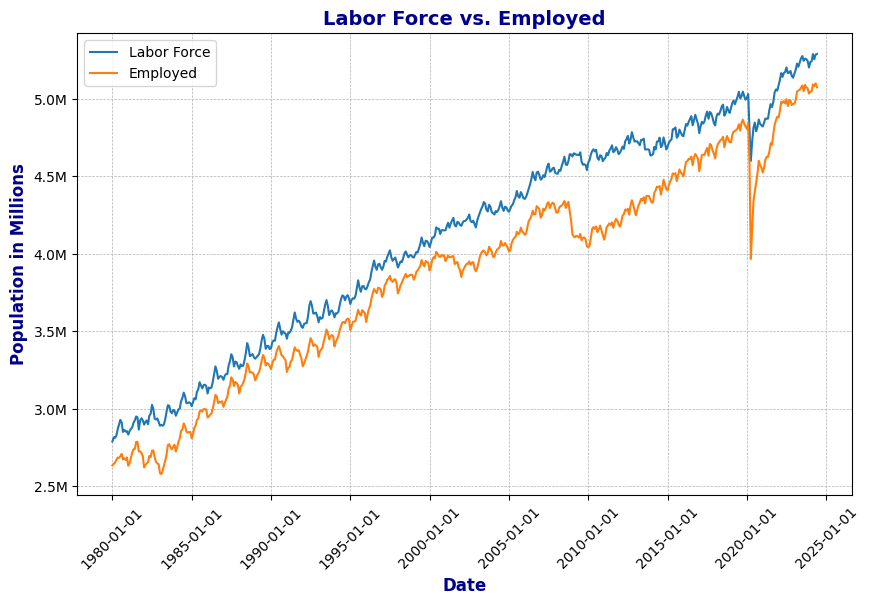

In [33]:
def format_m(value, tick_position):
    return f"{value/1000000}M"

unemployment = pd.read_csv("data/unemployment_rate.csv", index_col=0)
unemployment["Date"] = unemployment['Date'].astype("datetime64[ns]")
plt.figure(figsize=(10, 6))

plt.plot(unemployment['Date'], unemployment['Labor Force'], label="Labor Force")
plt.plot(unemployment['Date'], unemployment['Employed'], label="Employed")


plt.title("Labor Force vs. Employed", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Population in Millions", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

#
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_m))
plt.xticks(pd.date_range(start=pd.Timestamp('1980-01-01'),
                         end=pd.Timestamp('2025-01-01'),
                         freq='5YS'), rotation=45)
plt.legend()
plt.savefig("graphs/labor_force_employed.png")
plt.show()

# House Price Affordability Index
- Goal: Create an index that tracks housing affordability over time.
- Graph Type: Composite Line Chart
- Description: Plot a line chart where you calculate an affordability index based on the ratio of income to house prices. You can overlay this with mortgage rates to see how they impact affordability.
- Use Case: This index will highlight periods where housing became more or less affordable relative to income.

,date,value_h,changed_h,value_i,changed_i,affordability
0,1980-01-01,100.00,0.000000,8350.0,0.000000,0.011976
1,1981-01-01,106.21,6.128613,9309.0,11.485030,0.011409
2,1982-01-01,106.69,6.609981,9864.0,17.447002,0.010816
3,1983-01-01,112.97,12.480768,10639.0,25.303855,0.010618
4,1984-01-01,118.25,17.121982,11850.0,36.686504,0.009979


[]

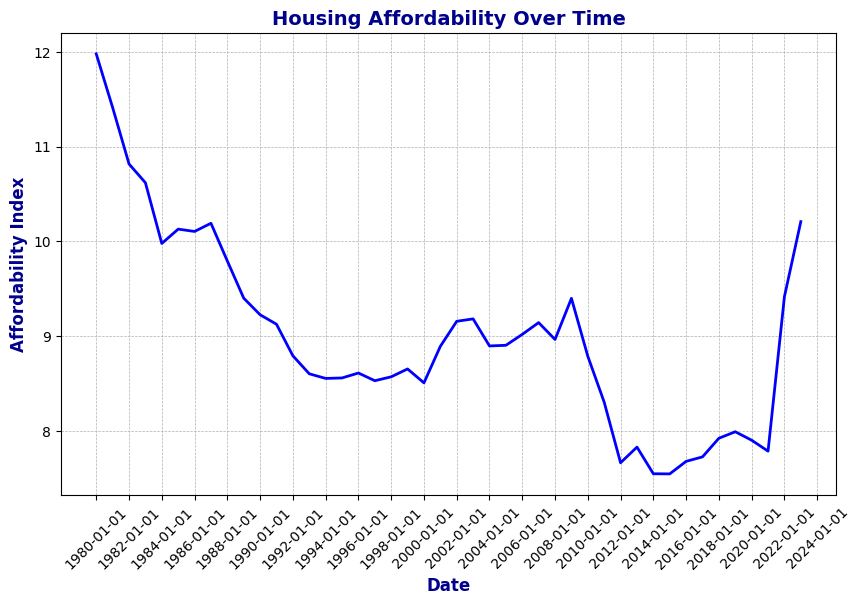

In [34]:
house_df = pd.read_csv("data/house.csv", index_col=0)
income_df = pd.read_csv("data/income.csv", index_col=0)

house_income_df = pd.merge(house_df, income_df, on='date', suffixes=('_h', '_i'))
house_income_df['affordability'] = house_income_df['value_h']/ house_income_df['value_i']
house_income_df['date'] = house_income_df['date'].astype("datetime64[ns]")

display(house_income_df.head())
plt.figure(figsize=(10, 6))

plt.plot(house_income_df['date'], house_income_df['affordability']*1000, linewidth=2, linestyle='-', color='blue')
plt.title("Housing Affordability Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Affordability Index", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(pd.date_range(start=pd.Timestamp('1980-01-01'),
                         end=pd.Timestamp('2025-01-01'),
                         freq='2YS'), rotation=45)
plt.savefig("graphs/housing_affordabilty.png")
plt.plot()

In [54]:
def conversion_date_value_2(df):
    """Convert the columns date to datetime and value to float"""
    conversions = {
    'date': 'datetime64[ns]',
    'value': float
    }

    # Drop any rows where the value column is non numeric
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df.astype(conversions)

    return df

affordability = house_income_df[['date', 'affordability']]
affordability.columns = ['date', 'value']
affordability = conversion_date_value_2(affordability)
mortgage = conversion_date_value_2(data_dict['mortgage_df'][['date', 'value']])
mortgage['year'] = mortgage['date'].dt.year
affordability['year'] = affordability['date'].dt.year
mortgage_year = mortgage.groupby('year').mean().reset_index()
combined_df = pd.merge(mortgage, affordability, on="year")
combined_df = combined_df.drop(columns=(['date_x', 'date_y']))
combined_df.columns = ['mortgage rate', 'year', 'affordability']
combined_df.head()

/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_11710/3045095233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = pd.to_numeric(df['value'], errors='coerce')
/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_11710/3045095233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = pd.to_numeric(df['value'], errors='coerce')


,mortgage rate,year,affordability
0,12.85,1980,0.011976
1,12.90,1980,0.011976
2,12.87,1980,0.011976
3,12.89,1980,0.011976
4,12.85,1980,0.011976


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


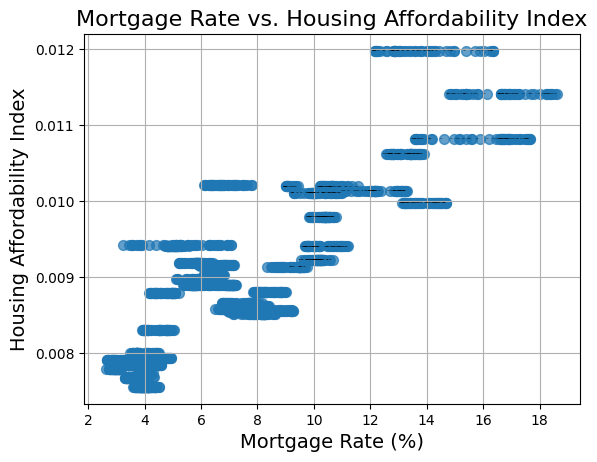

In [62]:
plt.scatter(combined_df['mortgage rate'], combined_df['affordability'],s=50, alpha=0.7)
for i in range(len(df)):
    plt.text(combined_df['mortgage rate'][i], combined_df['affordability'][i], combined_df['year'][i], fontsize=1, ha='right')

# Title and labels
plt.title('Mortgage Rate vs. Housing Affordability Index', fontsize=16)
plt.xlabel('Mortgage Rate (%)', fontsize=14)
plt.ylabel('Housing Affordability Index', fontsize=14)

# Grid and show plot
plt.grid(True)
plt.savefig('graphs/mortgage_housing_scatter.png')
plt.show()

# Correlation Analysis
- Goal: Investigate relationships between different economic indicators.
- Graph Type: Correlation Matrix / Heatmap
- Description: Create a heatmap that shows the correlation coefficients between different pairs of indicators (e.g., income vs. house prices, minimum wage vs. CPI). This will help identify any strong positive or negative correlations.
- Use Case: Useful for understanding the degree to which one variable might influence another.

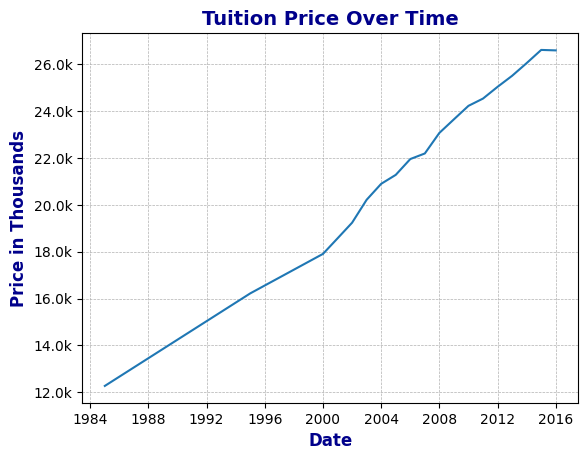

In [ ]:
population_csv = pd.read_csv("data/population.csv")
mortgage_csv = pd.read_csv("data/mortgage.csv")
cpi_csv = pd.read_csv("data/cpi.csv", index_col=0)
minimum_wage_csv = pd.read_csv("data/minimum_wage.csv")
historical_tuition_csv = pd.read_csv("data/historical_tuition.csv")

historical_tuition_csv['year'] = pd.to_datetime((historical_tuition_csv['year'].str[:4]), format='%Y')
historical_tuition_csv = historical_tuition_csv.loc[(historical_tuition_csv['tuition_type'] == "4 Year Constant") & (historical_tuition_csv['type'] == "All Institutions")].reset_index(drop=True)
historical_tuition_csv.drop(columns=['tuition_type', 'type'], inplace=True)

plt.plot(historical_tuition_csv['year'], historical_tuition_csv['tuition_cost']/1000)

plt.title("Tuition Price Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("graphs/tuition_price_over_time.png")
plt.show()

[]

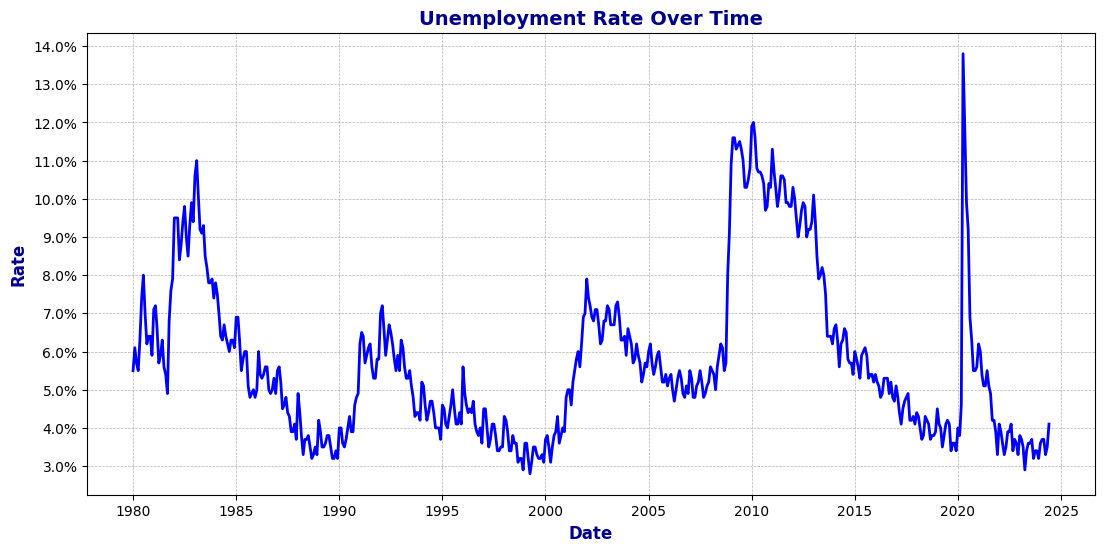

In [ ]:
unemployment.head()
plt.figure(figsize=(13, 6))
plt.plot(unemployment['Date'], unemployment['Unemployment Rate(%)'], linewidth=2, linestyle='-', color='blue')
plt.title("Unemployment Rate Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Rate", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 20, 1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("graphs/unemployment_rate_over_time.png")
plt.plot()

In [ ]:
start_end_data = {
    "income": [8350, 60484],
    "house": [100000, 649300],
    "electricity": [0.053, 0.169],
    "gas": [1.131, 3.289],
    "car": [7574, 48000],
    "rent": [255, 1350],
    "min_wage": [2.75, 7.25],
    # "mortgage_rate": [12.85, 6.61],
    "population": [5.9, 10.8]
}
df = pd.DataFrame(start_end_data)
df = df.transpose()
df.columns = [1980, 2023]
df['change'] = (df[2023] - df[1980]) / df[1980] * 100


adjusted_start_end_data = {
    "income": [21020, 60484],
    "house": [100000, 649300],
    "electricity": [0.053, 0.169],
    "gas": [1.131, 3.289],
    "car": [28000, 48000],
    "rent": [255, 1350],
    "min_wage": [2.75, 7.25],
    # "mortgage_rate": [12.85, 6.61],
    "population": [5.9, 10.8]
}
adjusted_df = pd.DataFrame(adjusted_start_end_data)
adjusted_df = adjusted_df.transpose()
adjusted_df.columns = [1980, 2023]
adjusted_df['change'] = (adjusted_df[2023] - adjusted_df[1980]) / adjusted_df[1980] *100
adjusted_df


,1980,2023,change
income,21020.000,60484.000,187.745005
house,100000.000,649300.000,549.300000
electricity,0.053,0.169,218.867925
gas,1.131,3.289,190.804598
car,28000.000,48000.000,71.428571
rent,255.000,1350.000,429.411765
min_wage,2.750,7.250,163.636364
population,5.900,10.800,83.050847


[]

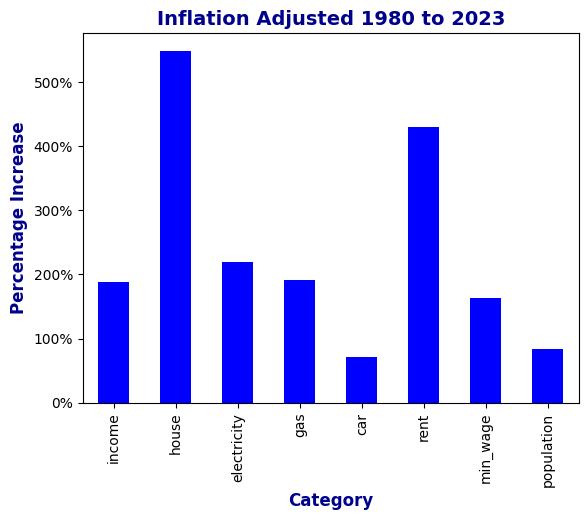

In [ ]:
adjusted_df['change'].plot(kind='bar', color='blue')
plt.title("Inflation Adjusted 1980 to 2023", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percentage Increase", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Category", fontsize=12, fontweight='bold', color='darkblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.savefig("graphs/bar_price_increase.png")
plt.plot()

[]

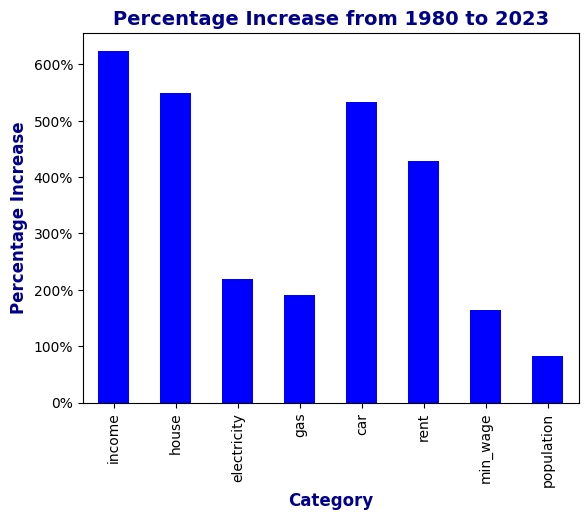

In [ ]:

df['change'].plot(kind='bar', color='blue')
plt.title("Percentage Increase from 1980 to 2023", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percentage Increase", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Category", fontsize=12, fontweight='bold', color='darkblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.savefig("graphs/bar_price_increase.png")
plt.plot()